In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns

In [68]:
dataset = pd.read_csv('housing_dataset.csv', sep=",", decimal='.')
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [69]:
profile = ProfileReport(dataset, title="Profiling Report", explorative=True)

In [70]:
#profile

C:\Users\jose_\AppData\Local\Temp\ipykernel_6396\3919703661.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot:>

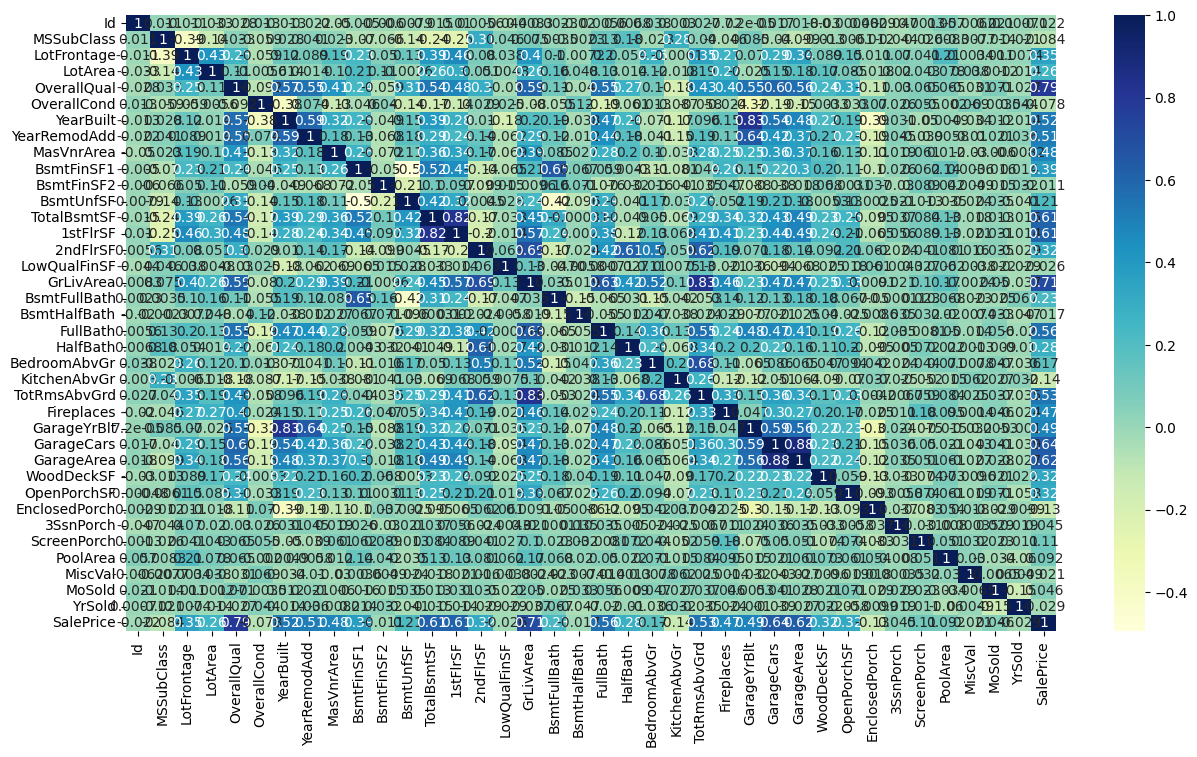

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")

OverallQual	= 0.790982 /
YearBuilt = 0.522897 /
YearRemodAdd = 0.507101

Visualisation de quelques variables numériques

Taille de la propiété VS Prix de Vente

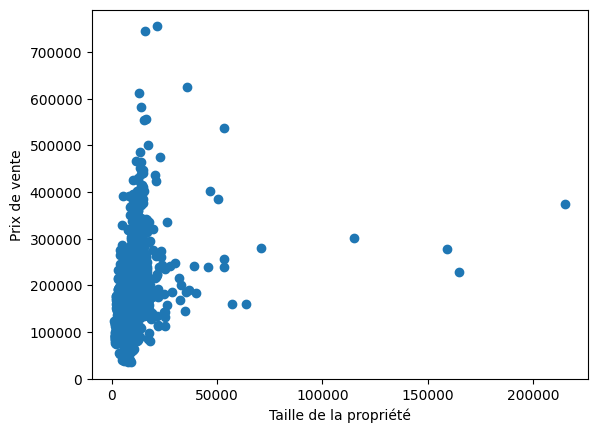

In [72]:
plt.scatter(dataset["LotArea"], dataset["SalePrice"])
plt.xlabel("Taille de la propriété")
plt.ylabel("Prix de vente")
plt.show()

<AxesSubplot:>

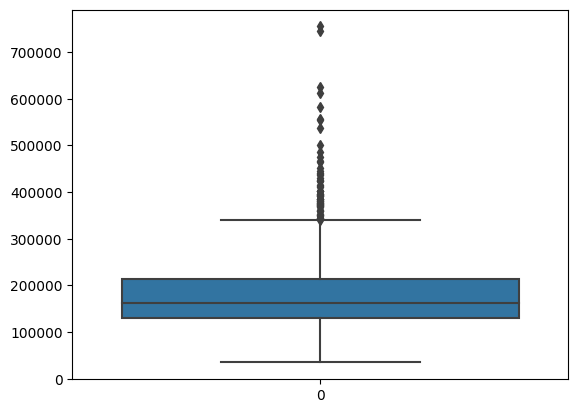

In [73]:
sns.boxplot(dataset["SalePrice"])

In [74]:
# IQR
q1, q3 = np.percentile(dataset['SalePrice'],[25, 75])
print(q1, q3)

IQR = q3 - q1
 
print(IQR)

lower_fence = q1 - (1.5*IQR)
higher_fence = q3 + (1.5*IQR)
print(lower_fence, higher_fence)

129975.0 214000.0
84025.0
3937.5 340037.5


<AxesSubplot:>

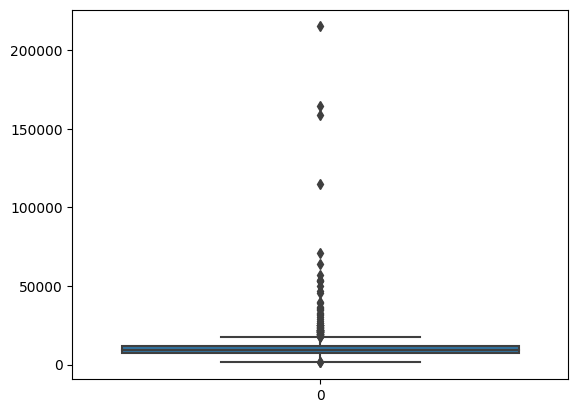

In [75]:
sns.boxplot(dataset["LotArea"])

In [76]:
# IQR
q1_, q3_ = np.percentile(dataset['LotArea'],[25, 75])
print(q1_, q3_)

IQR = q3_ - q1_
 
print(IQR)

lower_fence = q1_ - (1.5*IQR)
higher_fence = q3_ + (1.5*IQR)
print(lower_fence, higher_fence)

7553.5 11601.5
4048.0
1481.5 17673.5


Removing Outliers

In [77]:
# Upper bound
upper = np.where(dataset['LotArea'] >= (q3+1.5*IQR))
# Lower bound
lower = np.where(dataset['LotArea'] <= (q1-1.5*IQR))

Condition de la propiété VS Prix de vente

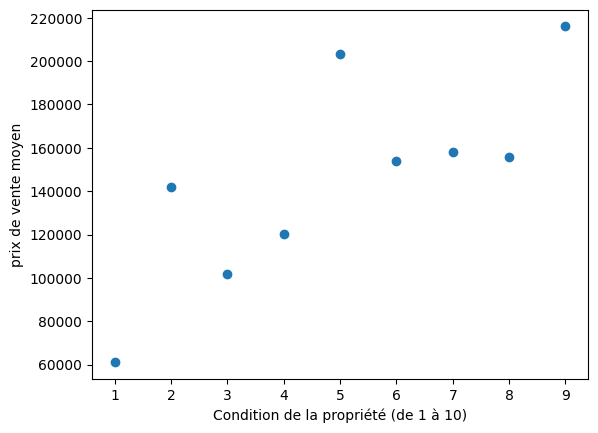

In [78]:
plot = dataset.groupby("OverallCond")["SalePrice"].mean()
plt.scatter(np.unique(dataset["OverallCond"]), plot)
plt.xlabel("Condition de la propriété (de 1 à 10)")
plt.ylabel("prix de vente moyen")
plt.show()

Année de construction VS Prix de Vente Moyen

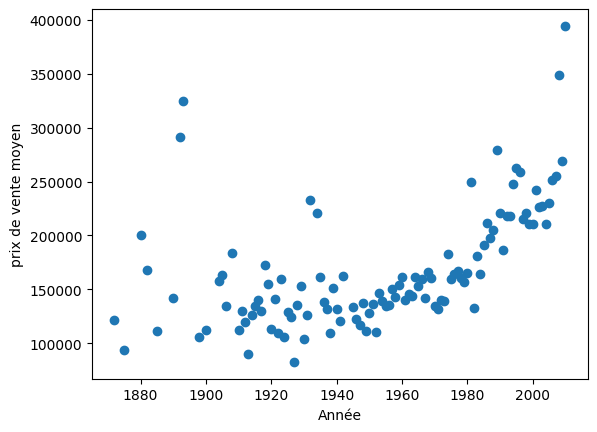

In [79]:
plot = plot = dataset.groupby("YearBuilt")["SalePrice"].mean()
plt.scatter(np.unique(dataset["YearBuilt"]), plot)
plt.xlabel("Année")
plt.ylabel("prix de vente moyen")
plt.show()

In [80]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [81]:
dataset.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [82]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


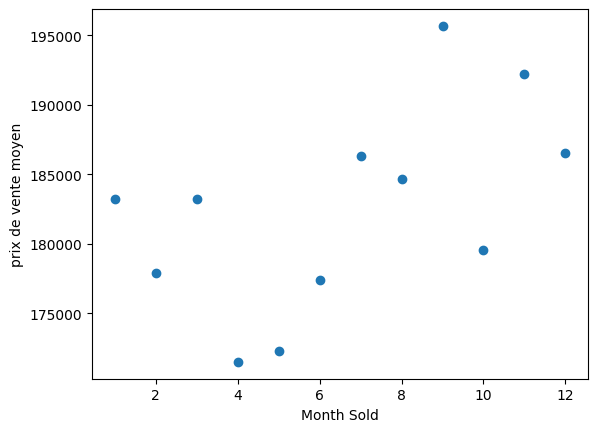

In [83]:
plot = dataset.groupby("MoSold")["SalePrice"].mean()
plt.scatter(np.unique(dataset["MoSold"]), plot)
plt.xlabel("Month Sold")
plt.ylabel("prix de vente moyen")
plt.show()

In [84]:
def isnan(dataframe, column):
    for i in range(0, column):
            if dataframe.iloc[:,i].isnull().any() == True:
                print("Column ", i, "has Nan")


In [85]:
isnan(dataset, 81)

Column  3 has Nan
Column  6 has Nan
Column  25 has Nan
Column  26 has Nan
Column  30 has Nan
Column  31 has Nan
Column  32 has Nan
Column  33 has Nan
Column  35 has Nan
Column  42 has Nan
Column  57 has Nan
Column  58 has Nan
Column  59 has Nan
Column  60 has Nan
Column  63 has Nan
Column  64 has Nan
Column  72 has Nan
Column  73 has Nan
Column  74 has Nan


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [87]:
dataset["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [88]:
for i in range(0, 81):
    if type(dataset.iloc[0, i]) == str or np.isnan(dataset.iloc[0,i]):
        if dataset.iloc[:,i].isnull().any() == True:
            dataset.iloc[:, i] = dataset.iloc[:, i].replace(np.nan, "NA", regex = True)

In [89]:
isnan(dataset, 81)

Column  3 has Nan
Column  26 has Nan
Column  59 has Nan


In [90]:
dataset['MasVnrType']= dataset['MasVnrType'].replace(['NA','NONE'])

In [91]:
dataset["MasVnrType"].describe()

count     1460
unique       4
top       None
freq       869
Name: MasVnrType, dtype: object

In [92]:
dataset["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Séparation des variables indépendantes de la variable dépendantes

In [93]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, 80:81].values

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

k = []
for i in range(0, 79):
    if type(X[:,i].any()) == int or type(X[:,i].any()) == float:
        if X[:,i].sum() != X[:,i].sum():
            k += [i]
imputer.fit(X[:, k])
X[:,k] = imputer.transform(X[:, k])

Traiter toutes les variables comme des variables ordinales et les encoder rapidement

In [95]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(0,79):
    if type(X[0,i]) == str:        
        X[:,i] = labelencoder.fit_transform(X[:,i])

Application de notre modèle de régression linéaire

On va séparer notre dataset en trainig set et test set (80/20)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Appliquons maintenant notre modèle de régression linéaire sur notre training set et faisons notre première prédiction sur X_test.

In [97]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

y_pred_lr = regressor_lr.predict(X_test)

Predictions VS Valeus Réelles

In [98]:
overview_y_pred = y_pred_lr
overview_y_test = y_test

overview = pd.DataFrame(data=np.column_stack((overview_y_pred,overview_y_test)),
                        columns=['Predictions','Valeurs Réelles'])

overview

,Predictions,Valeurs Réelles
0,47228.716279,67000.0
1,186641.034677,175000.0
2,116588.520766,114504.0
3,112191.183080,125500.0
4,97663.989850,100000.0
...,...,...
287,354847.366910,370878.0
288,59424.430039,92900.0
289,249034.240533,275000.0
290,288793.346923,290000.0


Evaluation de notre modèle

In [99]:
accuracy_lr = []
        
for i in range (0, 292):
    if y_test[i] - y_pred_lr[i] < 0:
        accuracy_lr.append(y_pred_lr[i] - y_test[i])
    else:
        accuracy_lr.append(y_test[i] - y_pred_lr[i])


accuracy_lr = np.asarray(accuracy_lr)
accuracy_lr.mean()

21288.617654717746